In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
data_path = r"C:\Users\sacii\OneDrive\Desktop\Oslomet\ACIT4510 Statistical learning\ACIT4510_statistical_learning_project\data\raw"

train_df = pd.read_csv(fr"{data_path}\train_df.csv")
test_df = pd.read_csv(fr"{data_path}\test_df.csv")
eval_df = pd.read_csv(fr"{data_path}\eval_df.csv")

print("Train:", train_df.shape, "| Test:", test_df.shape, "| Eval:", eval_df.shape)


Train: (1920, 12) | Test: (600, 12) | Eval: (480, 12)


In [16]:
# ============================
# 3. Target Separation
# ============================
X_train = train_df.drop(columns="Happiness Score").copy()
y_train = train_df["Happiness Score"].copy()

X_test = test_df.drop(columns="Happiness Score").copy()
y_test = test_df["Happiness Score"].copy()

X_eval = eval_df.drop(columns="Happiness Score").copy()
y_eval = eval_df["Happiness Score"].copy()


In [11]:
# ============================
# 4. Derived Feature Engineering
# ============================
exercise_map = {'Low': 0.0, 'Moderate': 0.5, 'High': 1.0}
diet_map = {'Junk Food': 0.0, 'Keto': 0.5, 'Vegetarian': 0.7, 'Vegan': 0.9, 'Balanced': 1.0}
stress_map = {'High': 0.0, 'Moderate': 0.5, 'Low': 1.0}

def add_engineered_features(df):
    df['Exercise_Num'] = df['Exercise Level'].map(exercise_map)
    df['Diet_Num'] = df['Diet Type'].map(diet_map)
    df['Stress_Num'] = df['Stress Level'].map(stress_map)
    
    df['Sleep_exercise'] = df['Sleep Hours'] * df['Exercise_Num']
    df['Healthy_index'] = (df['Exercise_Num'] + df['Diet_Num'] + df['Stress_Num']) / 3.0
    return df

X_train = add_engineered_features(X_train)
X_test = add_engineered_features(X_test)
X_eval = add_engineered_features(X_eval)


In [12]:
# ============================
# 5. Encoding + Scaling (Inline)
# ============================
numeric_features = [
    'Sleep Hours', 'Screen Time per Day (Hours)', 'Work Hours per Week',
    'Social Interaction Score', 'Sleep_exercise', 'Healthy_index'
]

categorical_features = ['Exercise Level', 'Diet Type', 'Stress Level']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)
X_eval_encoded = preprocessor.transform(X_eval)

print("Encoded shape:", X_train_encoded.shape)


Encoded shape: (1920, 14)


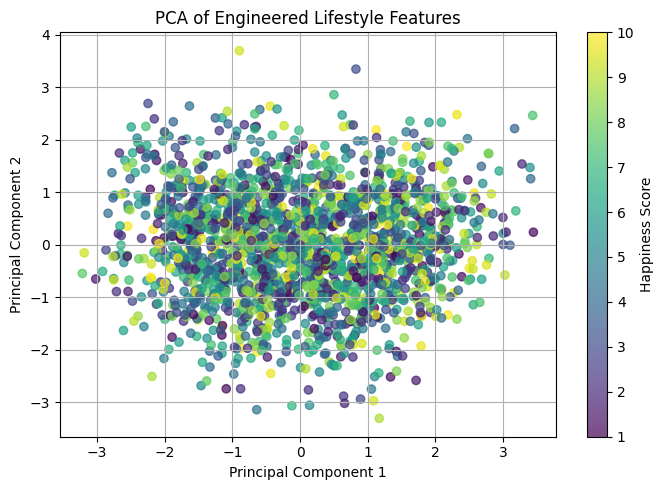

In [13]:
# ============================
# 6. PCA Visualization
# ============================
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Happiness Score")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Engineered Lifestyle Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# ============================
# 7. Save Processed Data
# ============================
save_path = r'C:\Users\sacii\OneDrive\Desktop\Oslomet\ACIT4510 Statistical learning\ACIT4510_statistical_learning_project\data\processed'

# Save feature matrices (NumPy binary format)
np.save(f"{save_path}\\X_train_encoded.npy", X_train_encoded)
np.save(f"{save_path}\\X_test_encoded.npy", X_test_encoded)
np.save(f"{save_path}\\X_eval_encoded.npy", X_eval_encoded)

# Save target variables
y_train.to_csv(f"{save_path}\\y_train.csv", index=False)
y_test.to_csv(f"{save_path}\\y_test.csv", index=False)
y_eval.to_csv(f"{save_path}\\y_eval.csv", index=False)

# Status summary
print("Saved processed features and targets:")
print("X_train:", X_train_encoded.shape, "| y_train:", y_train.shape)
print("X_test :", X_test_encoded.shape, "| y_test :", y_test.shape)
print("X_eval :", X_eval_encoded.shape, "| y_eval :", y_eval.shape)


Saved processed features and targets:
X_train: (1920, 14) | y_train: (1920,)
X_test : (600, 14) | y_test : (600,)
X_eval : (480, 14) | y_eval : (480,)
